In [2]:
import timm 
import torch
import os
import cv2
import numpy as np
import click
import matplotlib.pyplot as plt

In [3]:
import albumentations as A
from albumentations.pytorch import ToTensorV2

Import model

In [4]:
model = timm.create_model("resnet50", pretrained=True, num_classes=5, in_chans=1)

Prepare data

torch.Size([1, 224, 224])
torch.Size([1, 1, 224, 224])
torch.FloatTensor


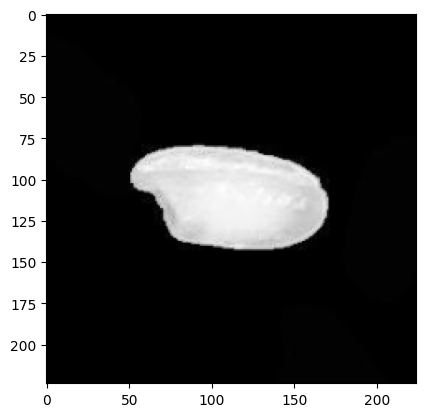

In [8]:
input_path = "../data/raw/Arborio/Arborio (1).jpg"


# Load the image
input_data = cv2.imread(input_path)
# Convert to RGB
input_data = cv2.cvtColor(input_data, cv2.COLOR_BGR2GRAY)




# Use albumentations to augment the image (resize and normalize)
transform = A.Compose([
    A.Resize(width=224, height=224),
    A.Normalize(mean=[0.5], std=[0.25], max_pixel_value=255.0),
    ToTensorV2()
])

input_data = transform(image=input_data)["image"]


print(input_data.shape) # (3,224,224)
# Show the image
plt.imshow(input_data.permute(1,2,0), cmap="gray")

# Unsqeeze to add a batch dimension (1,3,224,224
input_data = input_data.unsqueeze(0) # (1,3,224,224)
print(input_data.shape)


# Show type
print(input_data.type())

In [9]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Use albumentations to augment the image (resize and normalize)
transform = A.Compose([
    A.Resize(width=224, height=224),
    A.Normalize(),
    ToTensorV2()
])


LABLES = ["Arborio", "Basmati", "Ipsala", "Jasmine", "Karacadag"]
predictions = []



with torch.no_grad():
    for image in input_data:
        image = image.unsqueeze(0)

        output = model(image.float().to(device))
        probabilities = torch.nn.functional.softmax(output[0], dim=0)
        print(probabilities)

        predictions.append(output.argmax(dim=1).cpu())
        print(LABLES[predictions[0]])

    predictions = torch.cat(predictions, dim=0)

print(predictions)

tensor([0.1964, 0.2034, 0.2071, 0.1951, 0.1980])
Ipsala
tensor([2])
